In [116]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
orders=pd.read_csv('c:\\bootcamp\\eniac\\orders.csv',sep=';')
sellers=pd.read_csv('c:\\bootcamp\\eniac\\sellers.csv',sep=';')
order_items=pd.read_csv('c:\\bootcamp\\eniac\\order_items.csv',sep=';')
products=pd.read_csv('c:\\bootcamp\\eniac\\products.csv',sep=';')
products=products.set_index('product_id')
product_category_name_translation=pd.read_csv('c:\\bootcamp\\eniac\\product_category_name_translation.csv',sep=';')
product_category_name_translation=product_category_name_translation.set_index('product_category_name')
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_approved_at'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])

In [179]:
import numpy as np

In [118]:
# add columns for product category in portuguese and english to order_items

for index, row in order_items.iterrows():
    order_items.loc[index,'cat']=products.loc[row['product_id'],'product_category_name']

for index, row in order_items.iterrows():
    order_items.loc[index,'cat_engl']=product_category_name_translation.loc[row['cat'],'product_category_name_english']

order_items
    

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,cat,cat_engl
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 11:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 13:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 15:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 12:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 14:57:51,199.90,18.14,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 06:11:01,299.99,43.41,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 06:31:48,350.00,36.53,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 18:14:25,99.90,16.95,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 02:04:32,55.99,8.72,informatica_acessorios,computers_accessories


In [206]:
order_items['price'].max()

6735.0

In [78]:
tech_products=['computers','computers_accessories','consoles_games','telephony']

In [160]:
delay=orders[['order_estimated_delivery_date','order_delivered_customer_date']].dropna()
delay['delay']=(delay['order_estimated_delivery_date']-orders['order_delivered_customer_date'])
delay['delay_days']= delay['delay'] / np.timedelta64(1, 'D')

In [187]:
delay=delay.drop(8541,axis=0)

<AxesSubplot:>

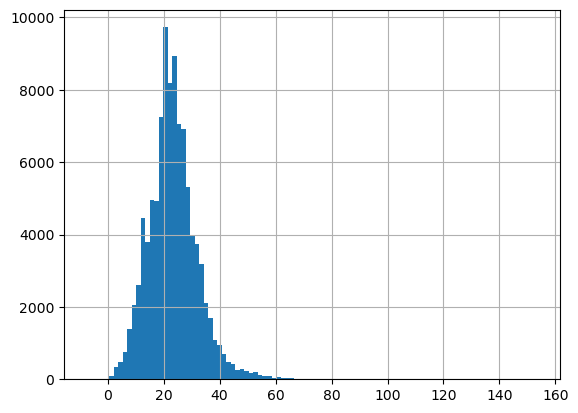

In [198]:

delay['delay_days'].hist(bins=100)

In [185]:
delay['delay_days'].sort_values()

8541    -145.678912
49869     -7.553310
26175     -6.664225
4066      -6.504097
42641     -5.666181
            ...    
41081    144.350567
77387    144.923530
7671     144.936910
2369     149.627928
92793    153.617697
Name: delay_days, Length: 99281, dtype: float64

In [147]:
delay=delay[:2]

for i in delay:
   delay[i]=i.seconds
delay

0                   15 days 14:14:25
1                   18 days 12:54:47
15 days 14:14:25               51265
18 days 12:54:47               46487
dtype: object

In [79]:
order_items_tech=order_items[order_items['cat_engl'].isin(tech_products)]

In [80]:
cats_total=order_items.groupby('cat_engl')['price'].agg(['sum','count']).sort_values('sum',ascending=False)

In [82]:
cats_tech_products=cats_total.loc[tech_products,:]
cats_tech_products['av']=cats_tech_products['sum']/cats_tech_products['count']
cats_tech_products


,sum,count,av
cat_engl,,,
computers,222963.13,203,1098.340542
computers_accessories,911954.32,7827,116.513903
consoles_games,157465.22,1137,138.491838
telephony,323667.53,4545,71.213978


In [209]:
cats_tech_products['sum'].sum()

1616050.2

In [107]:
sellers_orders=order_items_tech.groupby('seller_id')['price'].agg(['sum','count']).sort_values('sum',ascending=False)
sellers_orders['av']=sellers_orders['sum']/sellers_orders['count']


In [111]:
sellers_orders.sort_values('av').tail(60)

,sum,count,av
seller_id,,,
791cfcfe22fe4a771ece27f90017da92,596.26,2,298.130000
612170e34b97004b3ba37eae81836b4c,9559.00,32,298.718750
12b9676b00f60f3b700e83af21824c0e,299.00,1,299.000000
5b8154610ebb21fb90eb587365e673df,6980.20,23,303.486957
ed4acab38528488b65a9a9c603ff024a,11934.46,39,306.011795
16090f2ca825584b5a147ab24aa30c86,8596.97,27,318.406296
522620dcb18a6b31cd7bdf73665113a9,44733.39,138,324.155000
34d1ca11b242c0fee2c834ae8d788566,13422.24,41,327.371707
5bffbafbb22daf6d3bfc216a46db8708,4805.79,14,343.270714


<AxesSubplot:>

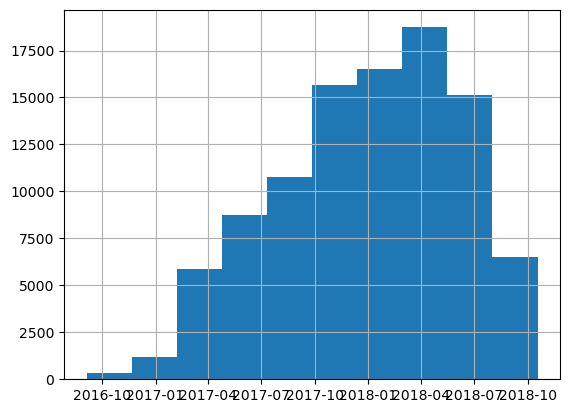

In [ ]:
orders.groupby(['order_status']).count()

In [245]:
l=(order_items_tech[order_items_tech['price']>=500]['price'].sum())
m=(order_items_tech[(order_items_tech['price']<500) & (order_items_tech['price']>=200) ]['price'].sum())
s=(order_items_tech[order_items_tech['price']<200]['price'].sum())
print(f's: {s:,.2f}')
print(f'm: {m:,.2f}')
print(f'l: {l:,.2f}')

print(f'{l+m+s:,.2f}')


s: 823,291.39
m: 288,027.81
l: 504,731.00
1,616,050.20


In [240]:
order_items_tech['price'].sum()

1616050.2000000002